# Linear Regression with NHANES Data

This tutorial will be taking an excerpt from the NHANES case study provided in this week and reviewing the linear regression portion.  We will cover model parameters such as coefficients, r-squared, and correlation.  Additionally, we will construct models utilzing more than one predictor, introduce how categorical variables are handled, and generate visualizations of our models.

As with our previous work, we will be using the
[Pandas](http://pandas.pydata.org) library for data management, the
[Numpy](http://www.numpy.org) library for numerical calculations, and
the [Statsmodels](http://www.statsmodels.org) library for statistical
modeling.

We begin by importing the libraries that we will be using:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
url = "../../2. Inferential Statistics/data/nhanes_2015_2016.csv"
da = pd.read_csv(url)

In [3]:
# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

In [4]:
da.head()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020
0,128.0,62,1,3,5.0,27.8,1
1,146.0,53,1,3,3.0,30.8,1
2,138.0,78,1,3,3.0,28.8,1
3,132.0,56,2,3,5.0,42.4,2
4,100.0,42,2,4,4.0,20.3,2


## Linear regression


### Simple Linear Regression with One Covariate

In [5]:
### OLS Model of BPXSY1 with RIDAGEYR
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          2.09e-259
Time:                        01:57:55   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
da.BPXSY1.std()

18.486559500781865

### R-squared and correlation

The primary summary statistic for assessing the strength of a
predictive relationship in a regression model is the *R-squared*, which is
shown to be 0.207 in the regression output above.  This means that 21%
of the variation in SBP is explained by age.  Note that this value is
exactly the same as the squared Pearson correlation coefficient
between SBP and age, as shown below.

In [7]:
cc = da[["BPXSY1", "RIDAGEYR"]].corr()
print(cc.BPXSY1.RIDAGEYR**2)

0.20715459625188243


### Adding a Second Predictor

Now we will add gender to our initial model so we have two predictors, age and gender.

In [8]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [9]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.87e-268
Time:                        01:57:56   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The syntax `RIDAGEYR + RIAGENDRx` in the cell above does not mean
that these two variables are literally added together.  Instead,
it means that these variables are both included in the model as
predictors of blood pressure (`BPXSY1`).

The model that was fit above uses both age and gender to explain the
variation in SBP.  It finds that two people with the same gender whose
ages differ by one year tend to have blood pressure values differing
by 0.47 units, which is essentially the same gender parameter that we found above in
the model based on age alone.  This model also shows us that comparing
a man and a woman of the same age, the man will on average have 3.23 units
greater SBP.

It is very important to emphasize that the age coefficient of 0.47 is
only meaningful when comparing two people of the same gender, and the
gender coefficient of 3.23 is only meaningful when comparing two
people of the same age.
Moreover, these effects are additive, meaning that if we compare, say, a 50 year
old man to a 40 year old woman, the man's blood pressure will on
average be around 3.23 + 10*0.47 = 7.93 units higher, with the first
term in this sum being attributable to gender, and the second term
being attributable to age.

We noted above that the regression coefficient for age did not change
by much when we added gender to the model.  It is important to note
however that in general, the estimated coefficient of a variable in a
regression model will change when other variables are added or
removed.  We see here that a coefficient is nearly unchanged if any
variables that are added to or removed from the model are
approximately uncorrelated with the other covariates that are already
in the model.

Below we confirm that gender and age are nearly uncorrelated in this
data set (the correlation of around -0.02 is negligible):

In [10]:
# We need to use the original, numerical version of the gender
# variable to calculate the correlation coefficient.
da[["RIDAGEYR", "RIAGENDR"]].corr()

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


### A model with three variables

Next we add a third variable, body mass index (BMI), to the model predicting SBP.
[BMI](https://en.wikipedia.org/wiki/Body_mass_index) is a measure that is used
to assess if a person has healthy weight given their height.
[BMXBMI](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BMX_I.htm#BMXBMI)
is the NHANES variable containing the BMI value for each subject.

In [11]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          8.54e-286
Time:                        01:57:56   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not surprisingly, BMI is positively associated with SBP.  Given two
subjects with the same gender and age, and whose BMI differs by 1
unit, the person with greater BMI will have, on average, 0.31 units
greater systolic blood pressure (SBP).  Also note that after adding
BMI to the model, the coefficient for gender became somewhat greater.
This is due to the fact that the three covariates in the model, age,
gender, and BMI, are mutually correlated, as shown next:

In [12]:
da[["RIDAGEYR", "RIAGENDR", "BMXBMI"]].corr()

,RIDAGEYR,RIAGENDR,BMXBMI
RIDAGEYR,1.000000,-0.021398,0.023089
RIAGENDR,-0.021398,1.000000,0.080463
BMXBMI,0.023089,0.080463,1.000000


Although the correlations among these three variables are not strong,
they are sufficient to induce fairly substantial differences in the
regression coefficients (e.g. the gender coefficient changes from 3.23
to 3.58).  In this example, the gender effect becomes larger after we
control for BMI - we can take this to mean that BMI was masking part
of the association between gender and blood pressure.  In other settings, including
additional covariates can reduce the association between a covariate
and an outcome.

### Visualization of the Fitted Models

In this section we demonstrate some graphing techniques that can be
used to gain a better understanding of a regression model that has
been fit to data.

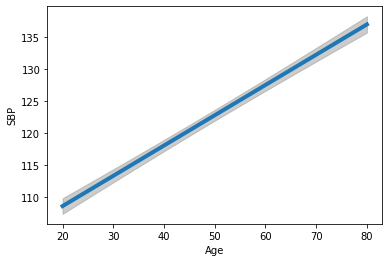

In [13]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")

The analogous plot for BMI is shown next.  Here we fix the
gender as "female" and the age at 50, so we are looking
at the relationship between expected SBP and age for women
of age 50.

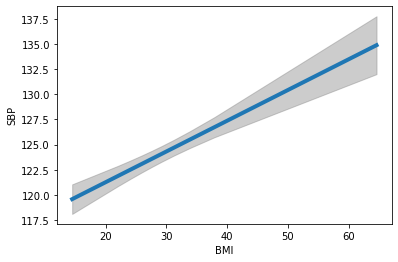

In [14]:
del values["BMXBMI"]
values["RIDAGEYR"] = 50
pr, cb, fv = predict_functional(result, "BMXBMI",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("BMI")
_ = ax.set_ylabel("SBP")

Below we show the plot of residuals on fitted values for the NHANES
data.  It appears that we have a modestly increasing mean/variance
relationship.  That is, the scatter around the mean blood pressure is
greater when the mean blood pressure itself is greater.

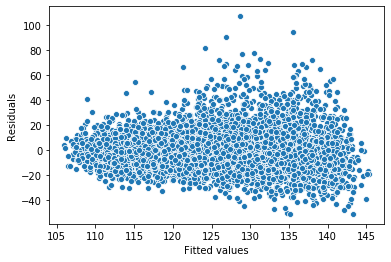

In [15]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

A "component plus residual plot" or "partial residual plot" is
intended to show how the data would look if all but one covariate
could be fixed at reference values.  By controlling the values of
these covariates, all remaining variation is due either to the "focus
variable" (the one variable that is left unfixed, and is plotted on
the horizontal axis), or to sources of variation that are unexplained
by any of our covariates.

For example, the partial residual plot below shows how age (horizontal
axis) and SBP (vertical axis) would be related if gender and BMI were
fixed.  Note that the origin of the vertical axis in these plots is
not meaningful (we are not implying that anyone's blood pressure would
be negative), but the differences along the vertical axis are
meaningful.  This plot implies that when BMI and gender are held
fixed, the average blood pressures of an 80 and 18 year old differ by
around 30 mm/Hg.  This plot also shows, as discussed above,
that the deviations from the
mean are somewhat smaller at the low end of the range compared to the
high end of the range.  We also see that at the high end of the range, the
deviations from the mean are somewhat right-skewed, with
exceptionally high SBP values being more common than exceptionally low SBP values.

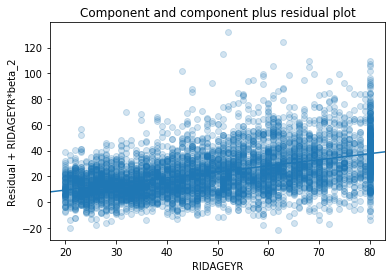

In [16]:
from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()
plot_ccpr(result, "RIDAGEYR", ax)
_ = ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency

Next we have a partial residual plot that shows how BMI (horizontal
axis) and SBP (vertical axis) would be related if gender and age were
fixed.  Compared to the plot above, we see here that age is more
uniformly distributed than BMI.  Also, it appears that there is more
scatter in the partial residuals for BMI compared to what we saw above
for age. Thus there seems to be less information about SBP in BMI,
although a trend certainly exists.

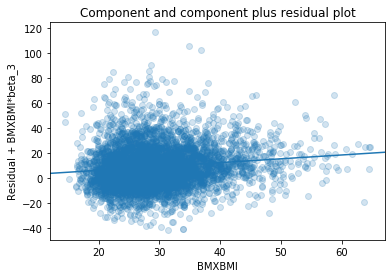

In [17]:
ax = plt.axes()
plot_ccpr(result, "BMXBMI", ax)
_ = ax.lines[0].set_alpha(0.2)